### **CC57 - MACHINE LEARNING - MODELO DE CLUSTERING / AGRUPAMIENTO o SEGMENTACION**

**K-Means:** Algoritmo de Clustering

La agrupación en clústeres es un tipo de algoritmo de aprendizaje no supervisado que implica agrupar puntos de datos similares en función de sus características. El objetivo de la agrupación es encontrar similitudes dentro de un conjunto de datos y agrupar puntos de datos similares manteniendo separados los puntos de datos diferentes.

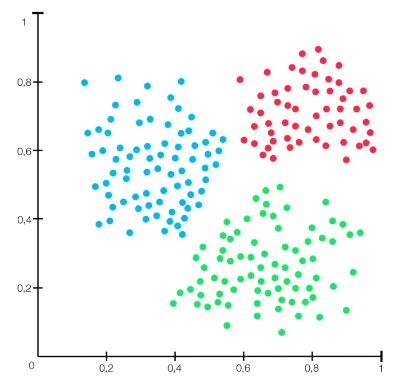

**0. Conjunto de Datos**

El archivo **clientes_tienda.csv** es un conjunto de datos completo que proporciona un análisis detallado de los clientes ideales de una tienda hipotética. Al recopilar y analizar datos de los clientes a través de tarjetas de membresía, este conjunto de datos proporciona información valiosa que puede ayudar a una empresa a comprender mejor a sus clientes.

El conjunto de datos incluye **2000 registros** y **8 columnas**, lo que proporciona una gran cantidad de información sobre la base de clientes de la tienda. Cada columna representa un aspecto específico del perfil del cliente, incluido su ID de cliente único, sexo, edad, ingresos anuales, puntuación de gastos, profesión, experiencia laboral y tamaño de la familia.

- **Customer ID:**  un identificador único asignado a cada cliente en el conjunto de datos. Se utiliza para diferenciar entre clientes individuales y realizar un seguimiento de sus compras y otros comportamientos.

- **Gender:** El sexo del cliente, ya sea hombre o mujer. El género se puede utilizar para analizar el comportamiento de compra y las preferencias entre géneros.

- **Age:** La edad del cliente, generalmente medida en años. La edad se puede utilizar para segmentar a los clientes en diferentes grupos de edad, lo que puede ayudar a identificar patrones de compra y preferencias entre los diferentes grupos de edad.

- **Annual Income:** El ingreso anual del cliente, generalmente medido en dólares u otra moneda. Los ingresos anuales se pueden utilizar para segmentar a los clientes en diferentes grupos de ingresos, lo que puede ayudar a identificar patrones de compra y preferencias entre diferentes niveles de ingresos.

- **Spending Score:** puntuación asignada por la tienda en función del comportamiento del cliente y la naturaleza del gasto. Esta puntuación se puede utilizar para segmentar a los clientes según sus patrones de compra, como clientes que gastan mucho, clientes que gastan poco y clientes que probablemente realicen compras impulsivas.

- **Profession:** La ocupación o profesión del cliente. La profesión se puede utilizar para analizar patrones de compra y preferencias entre diferentes profesiones.

- **Work Experience:** El número de años de experiencia laboral del cliente. Esta función se puede utilizar para segmentar a los clientes según su nivel de experiencia, lo que puede ayudar a identificar patrones de compra y preferencias entre diferentes niveles de experiencia.

- **Family Size:** el tamaño de la familia del cliente, generalmente medido en términos del número de miembros de la familia. El tamaño de la familia se puede utilizar para analizar patrones de compra y preferencias entre diferentes tamaños de familia, como familias con hijos versus familias sin hijos.

In [1]:
# Data
import numpy as np
import pandas as pd

# Visualizacion
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos de Segmentacion
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

**1. Carga de Datos y Procesamiento**

In [29]:
# leer el archivo
df = pd.read_csv("clientes_tienda.csv")

# Una vista
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [31]:
#Comprobacion de datos nulos
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Los datos considerados se componen de 2 características categóricas y 5 numéricas. De las características numéricas, todas excepto el atributo "profesión" están completamente completadas, lo que indica que no faltan valores. Sin embargo, la "característica de profesión" muestra una cantidad limitada de datos faltantes, con aproximadamente 35 valores nulos. Es importante señalar que la presencia de valores nulos, particularmente en una característica categórica, puede requerir imputación o eliminación para garantizar la integridad y precisión de los análisis de datos posteriores.

Debido a que se trata de una columna categórica, imputaremos el valor utilizando el valor de moda.

In [33]:
# Profesion con la moda
df.Profession.fillna(df["Profession"].mode()[0], inplace=True)

# Verifica nulos nuevamente
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

**2. Visuaizacion de Datos**

La visualización de datos es un proceso de creación de representaciones visuales de datos para facilitar la exploración, interpretación y comunicación de patrones y relaciones dentro de los datos. Es una herramienta poderosa para comprender datos complejos y comunicar conocimientos de manera efectiva.

In [34]:
# Obtener el recuento de cada género en el conjunto de datos.
gender_count = df['Gender'].value_counts()

# Cree un gráfico circular para visualizar la distribución de género en el conjunto de datos.
fig = px.pie(values=gender_count, names=gender_count.index)

# añadiendo un título y etiquetas.
fig.update_layout(title="Distribucion de Genero en el Dataset")

# Cree un gráfico de barras para visualizar la distribución de género en el conjunto de datos.
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index)

# Ver las graficas
fig.show()
fig2.show()

Del conjunto de datos se desprende claramente que el **número de candidatas es significativamente mayor que el número de candidatos masculinos**, lo que indica un s**esgo hacia el género femenino**. Específicamente, el conjunto de datos contiene alrededor de 1200 candidatas y solo aproximadamente 800 candidatos masculinos.

Es importante señalar que **dicho sesgo puede afectar potencialmente el rendimiento de los modelos de aprendizaje automático entrenados en este conjunto de datos**. Esto es particularmente cierto si el conjunto de datos se utiliza para predecir resultados o tomar decisiones que pueden estar influenciadas por el género.

Averigüemos cómo el género afecta las otras características.

In [35]:
# Crea un diagrama de caja de edad por género
age_gender_boxplot = px.box(df, x='Gender', y='Age', color='Gender', title='Distribution of Age by Gender')

# Display
age_gender_boxplot.show()

El diagrama de caja proporciona información clara sobre la distribución de la edad por género. De la gráfica se desprende claramente que el género no parece tener un impacto significativo en la distribución de edades. Tanto el género masculino como el femenino tienen distribuciones de edad similares sin diferencias significativas.

In [36]:
# Crea un diagrama de caja de edad por género
anual_income_gender_boxplot = px.box(df, x='Gender', y='Annual Income ($)', color='Gender', title='Distribucion de Ingresos Anuales ($) por Genero')

# Display
anual_income_gender_boxplot.show()

La distribución del ingreso anual versus el género es similar a la distribución de la edad versus el género. No hay un impacto significativo del género en los ingresos anuales. Y eso es realmente genial de ver.

Después de realizar un análisis de datos exploratorio sobre la función "Género", podemos concluir que no existe una fuerte correlación entre la distribución de género y cualquier otra característica (puedes intentar trazar curvas). Esto sugiere que el género no es un factor significativo a la hora de predecir los valores de otras variables. Esta conclusión es importante desde la perspectiva del aprendizaje automático porque implica que incluir el género como una característica en un modelo predictivo puede no conducir a mejoras significativas en la precisión. También indica que puede haber otros factores que sean más influyentes en la determinación de los valores de estas variables. Es posible que sea necesario realizar análisis adicionales, como generar una matriz de correlación o realizar ingeniería de características, para identificar estos factores y mejorar la precisión de nuestros modelos.

In [37]:
# Cree un histograma de la columna 'Edad' e incluya el gráfico de violín para mostrar la distribución.
fig = px.histogram(df, x='Age', marginal='violin')

# Display
fig.show()

Al analizar la distribución por edades del conjunto de datos, observamos que es bastante uniforme en todo el rango de edad, que va de 0 a 100 años. A pesar de un pequeño pico en el rango de edad de 30 a 34 años, que se desvía ligeramente de una distribución normal, todavía se encuentra dentro de un rango aceptable. Así, desde una perspectiva estadística, podemos concluir que los datos no están sesgados ni sesgados con respecto a la edad.

Además, desde el punto de vista del aprendizaje automático y el aprendizaje profundo, es esencial tener un conjunto de datos equilibrado que cubra todos los grupos de edad para garantizar un rendimiento óptimo del modelo. Por lo tanto, esta distribución equilibrada de la edad puede resultar beneficiosa para construir modelos precisos y sólidos que puedan generalizarse bien a partir de datos invisibles.

In [38]:
# Crea una grafica de violín para Edad versus Profesión
fig1 = px.violin(df, x='Age', y='Profession', color='Profession', title='Distribución de edad entre profesiones')

# Crear diagrama de caja para edad versus profesión
fig2 = px.box(df, x='Age', y='Profession', color='Profession', title='Distribución de edad entre profesiones')

# Display
fig1.show()
fig2.show()

Al examinar la distribución por edades de diferentes profesiones a través de un gráfico de violín, podemos observar que no hay una diferencia significativa en la distribución por edades entre profesiones. Esto es sorprendente, ya que uno esperaría que ciertas profesiones pudieran tener un sesgo de edad debido a factores como la educación y los requisitos de experiencia. Sin embargo, los datos sugieren lo contrario, y puede darse el caso de que la distribución de clientes en el conjunto de datos sea tal que cada profesión esté igualmente representada independientemente de su edad. Este es un hallazgo interesante y sugiere que la edad puede no ser un factor decisivo a la hora de predecir la profesión de un cliente.

Al analizar el diagrama de caja, se puede inferir que la edad está ligeramente relacionada con la profesión (a diferencia del diagrama del violín). La distribución de edades para las diferentes profesiones no es uniforme y existen variaciones en la distribución de edades entre profesiones. Desde el punto de vista del aprendizaje automático y del aprendizaje profundo, estas observaciones pueden ser cruciales para predecir la profesión de un individuo en función de su edad.

Además, cabe señalar que la mediana de la distribución por edades varía según las profesiones. Por ejemplo, la mediana de los ingenieros se desplaza hacia la derecha, lo que indica que la mayoría de los ingenieros tienen alrededor de 60 años. Por otro lado, la moda en marketing y amas de casa se desplaza hacia la izquierda, lo que indica que la mayoría de las personas en estas profesiones tienen alrededor de 40 años. Esta información puede ser valiosa para desarrollar estrategias de marketing para productos o servicios específicos de un grupo de edad o profesión en particular.

In [39]:
# Cree un gráfico de contorno de densidad para mostrar la relación entre la edad y la experiencia laboral.
fig1 = px.density_contour(df, x='Age', y='Work Experience', title='Gráfico de contorno de densidad')

# Cree un mapa de calor de densidad para mostrar la distribución de la edad y la experiencia laboral.
fig2 = px.density_heatmap(df, x='Age', y='Work Experience', title='Mapa de calor de densidad')

# Show the plots
fig1.show()
fig2.show()

El gráfico de contorno de densidad entre la edad y la experiencia laboral revela una tendencia interesante: la experiencia laboral no parece aumentar proporcionalmente con la edad. Esto no está en línea con lo que normalmente esperaríamos en el mundo real, donde la experiencia laboral generalmente viene con la edad. Es posible que el conjunto de datos sea demasiado ideal y no refleje con precisión la distribución del mundo real. Alternativamente, puede haber otros factores en juego que afectan la experiencia laboral independientemente de la edad, como cambios en las trayectorias profesionales o la educación.

In [40]:
# Cree un histograma de la columna 'Edad' e incluya el gráfico de violín para mostrar la distribución.
fig = px.histogram(df, x='Annual Income ($)', marginal='violin')

# Display
fig.show()

Al analizar el histograma del ingreso anual, surge un patrón llamativo. En particular, el recuento de personas que ganan entre cero y 50.000 es minúsculo: asciende a sólo 15. Los datos muestran que se produce un cambio sustancial después de la marca de 50.000, donde el recuento se dispara a alrededor de 70. Esta tendencia creciente continúa de forma lineal hasta que alcanza la marca de 100.000, después de lo cual se observan algunas fluctuaciones. Estas perturbaciones persisten hasta el rango de ingresos de 190.000.

In [41]:
# Cree un diagrama de caja para los ingresos anuales agrupados por profesión.
fig = px.box(df, y='Annual Income ($)', x='Profession', color="Profession")

# Titulo
fig.update_layout(title_text='Distribucion de los Ingresos Anuales po Profesion')

# Ver la grafica
fig.show()

Tras un análisis más detallado de la relación entre el ingreso anual y la profesión, parece que la distribución del ingreso para ciertas profesiones como la atención médica, la ingeniería, el derecho, el entretenimiento, el arte, los ejecutivos y la medicina, se mantiene relativamente estable. Sin embargo, hay algunos cambios notables en la distribución del ingreso de las personas que se dedican a la profesión de amas de casa, donde los valores más bajos tienden a subir ligeramente.

Además, el ingreso medio de las profesiones antes mencionadas se mantiene relativamente constante en aproximadamente 100.000, mientras que el ingreso medio de las personas que se dedican a la profesión de amas de casa experimenta una ligera disminución. Por otro lado, la profesión de marketing experimenta un cambio notable: la distribución general del ingreso se mantiene constante, aunque el ingreso medio aumenta.

In [42]:
# Cree un histograma de la columna 'Edad' e incluya el gráfico de violín para mostrar la distribución.
fig = px.histogram(df, x='Spending Score (1-100)', marginal='box')

# Display
fig.show()

Al examinar el histograma de la puntuación del gasto, resulta evidente que los recuentos de frecuencia son más o menos consistentes en todo momento. Sin embargo, existe un pico notable en el recuento de frecuencia dentro del rango de 45 a 49 en la puntuación de gasto. Este pico presenta una inclinación gradual. A medida que avanzamos hacia el final del histograma, el recuento de frecuencia experimenta una disminución extrema, cayendo a apenas 18. El recuento de frecuencia inicial se mantuvo alrededor de 80 y alcanzó un máximo de 134 antes de caer a 18, lo que marca una variación significativa en los recuentos. A pesar de estas fluctuaciones, la distribución mantiene una tendencia constante, moviéndose gradualmente hacia arriba y hacia abajo.

In [43]:
# Extraer el recuento de cada profesión del dataframe y almacenarlo en profession_dis
profession_dis = df.Profession.value_counts()

# Extrayendo los nombres de cada profesión del índice profession_dis
names = profession_dis.index

# Crear un gráfico circular para visualizar la distribución de los valores de los datos de la profesión.
fig = px.pie(values=profession_dis, names=names, color=names)

# Titulo
fig.update_layout(title_text='Distribución de valores de datos de profesión')

# Display
fig.show()

Para dar una visión general de la distribución de los clientes entre las profesiones del conjunto de datos, se puede observar que alrededor del 30% del total de clientes están clasificados como artistas. Los profesionales sanitarios cubren alrededor del 17% del total de clientes, lo que lo convierte en el segundo grupo más grande. Le sigue de cerca la industria del entretenimiento, con alrededor del 11,7% del total de clientes. Sin embargo, las amas de casa constituyen la fracción más pequeña de clientes, con sólo el 3% del total de clientes pertenecientes a esta categoría.

Al examinar la distribución de la profesión de ama de casa, no fue sorprendente descubrir que tenían el recuento más bajo, considerando que las tareas del hogar ya no son la ocupación principal de las mujeres en la sociedad moderna. Sin embargo, fue inesperado ver un aumento tan pronunciado en la profesión de artista, que representa la mayor parte de los clientes con aproximadamente el 30%. Si bien a menudo se cree que las profesiones de ingeniería son más frecuentes que otras, el predominio de los artistas en el conjunto de datos es digno de mención e indica la creciente importancia del arte y la expresión creativa en la sociedad moderna.

In [44]:
# Cree un diagrama de caja para los ingresos anuales agrupados por profesión.
fig = px.box(df, y='Work Experience', x='Profession', color="Gender")

# Set the title of the plot
fig.update_layout(title_text='Distribución Anual del Ingreso por Profesión')

# Show the plot
fig.show()

Al analizar el diagrama de caja de la experiencia laboral en diferentes profesiones, se pueden observar varias ideas importantes.

- En particular, los departamentos de atención médica, ejecutivos, médicos y de marketing tienen una mayor variedad general de experiencia laboral en comparación con otros sectores. Sin embargo, vale la pena señalar que los sectores de abogados y entretenimiento tienen una experiencia laboral promedio de solo un año, lo cual es relativamente bajo. Si bien la distribución para ambos sectores es razonable, comenzando con un mínimo de un año y llegando hasta alrededor de siete años, los valores medianos no son satisfactorios.

- Por el contrario, la experiencia laboral media de los profesionales sanitarios, ejecutivos y médicos oscila entre un año y unos ocho años, lo que es de esperar dada la naturaleza de su trabajo. Aunque la experiencia media de los médicos es inferior a la de los departamentos de salud y ejecutivos, situándose en sólo dos años, lo que vuelve a ser insatisfactorio.

- Además, en los datos se observan algunos casos atípicos excepcionales, como el profesional con una experiencia laboral de 17 años en el sector de abogados y artistas, lo cual es impresionante. Sin embargo, el aspecto más importante que merece atención es la profesión de ama de casa, que tiene un rango de experiencia laboral significativamente mayor, que va desde unos tres años hasta nueve años. Esto no es sorprendente, ya que una vez que alguien ingresa a esta profesión, es menos probable que la abandone por un período prolongado. Además, el valor mediano también es alto, siendo el valor mediano máximo en toda la distribución de alrededor de siete años. Esto indica que es probable que las personas en esta profesión trabajen durante al menos siete años.

- Al considerar las diferencias de género, se pueden observar variaciones notables en la distribución de los datos. El valor mediano cambia significativamente para algunas profesiones al comparar hombres y mujeres. Por ejemplo, en el sector sanitario, el valor medio es bajo para las mujeres y alto para los hombres. Esto podría deberse a la profesión de enfermero y médico, donde los médicos generalmente son percibidos como hombres y las enfermeras como mujeres.

- Curiosamente, en ingeniería, el valor medio de la experiencia de las mujeres es mucho mayor que el de los hombres. Las mujeres tienen un valor medio de experiencia laboral de cuatro años, mientras que los hombres sólo tienen alrededor de uno o dos años. De manera similar, en el caso de los médicos, las mujeres tienen una experiencia laboral de un año, mientras que los hombres tienen tres años, aunque el rango general es aproximadamente el mismo.

- Por último, para la profesión de ama de casa, los valores superiores tanto para hombres como para mujeres son los mismos, pero los valores inferiores difieren. Parece que los hombres comienzan a trabajar como amas de casa antes que las mujeres, con una experiencia laboral de alrededor de dos años, mientras que las mujeres tienen una experiencia laboral mínima de cuatro años. No obstante, el valor mediano es el mismo para ambos sexos.

Al analizar el conjunto de datos, parece que no hay distribuciones de datos significativas ni nuevos conocimientos que encontrar. Todas las visualiazciones creadas no han permitido descubrir información innovadora.

**3. Procesamiento de los Datos**

Ahora que comprendemos bien cómo se distribuyen los datos y qué conocimientos representan, podemos pasar al paso crucial del preprocesamiento de datos. Este paso implica limpiar y transformar los datos para prepararlos para el análisis.

In [45]:
# define columnas categoricas
categorical_columns = ['Gender', 'Profession']

# definen las columnas notables.
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

In [46]:
# Convierta columnas categóricas en columnas numéricas.
for cat_col in categorical_columns:

    # Inicialice el codificador de etiquetas.
    encoder = LabelEncoder()

    # Aplicar transformación.
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [47]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


Se recomienda realizar un escalado de características en el conjunto de datos para llevar todas las columnas de características a un rango estándar. Esto se debe a que el rango actual de cada columna de características es diferente de las otras columnas de características, lo que puede tener un impacto significativo en el rendimiento del modelo. Para lograr esto, se puede utilizar el escalador estándar, que es un método popular para escalar datos numéricos.

In [48]:
# Inicializar el escalar estándar.
scaler = StandardScaler()

# Datos reescalados.
df.drop(columns=['CustomerID'], inplace=True)
full_data = scaler.fit_transform(df)

In [49]:
# Veremos...
full_data[:5]

array([[ 1.20706357, -1.05408932, -2.09350095, -0.42833854,  0.87049473,
        -0.79120713,  0.11749744],
       [ 1.20706357, -0.98372287, -1.65613312,  1.07554599, -0.30637962,
        -0.28116224, -0.39005088],
       [-0.82845678, -1.0189061 , -0.54084515, -1.6099621 , -0.30637962,
        -0.79120713, -1.40514752],
       [-0.82845678, -0.91335643, -1.13129172,  0.93231889,  1.65507763,
        -1.04622958, -0.8975992 ],
       [-0.82845678, -0.63189066, -1.59052794, -0.39253176,  0.08591183,
        -0.53618469,  1.13259408]])

Hemos completado los pasos previos al procesamiento necesarios. Ahora podemos avanzar hacia la construcción de modelos.

**5. Correlacion de Datos**


In [50]:
# Calcular correlación
corr = df.corr()

# Crear el mapa de calor de la matriz de correlación
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlacion')))

# Actualizar el diseño del mapa de calor
fig.update_layout(title='Mapa de calor de matriz de correlación',
                  xaxis=dict(side='top'))

# Ver
fig.show()

Ciertamente. De la matriz de correlación, podemos observar que no existen fuertes correlaciones entre las características del conjunto de datos. No hay correlaciones positivas ni negativas y los valores entre cada par de características son cercanos a cero. Esto indica que las características de los datos no están correlacionadas entre sí y puede haber un problema con el conjunto de datos. Esto podría dificultar que un modelo identifique con precisión los grupos o patrones presentes en los datos.

Esta falta de correlación no es algo que normalmente observamos en conjuntos de datos del mundo real. En escenarios del mundo real, las características suelen estar más interrelacionadas y una matriz de correlación suele mostrar correlaciones positivas o negativas más fuertes entre las características. Esto sugiere que puede haber factores subyacentes que afecten los datos y que no hemos tenido en cuenta. Para comprender mejor los datos y mejorar nuestros resultados, es posible que necesitemos realizar más análisis exploratorios e ingeniería de funciones para descubrir estos factores.

**6. Análisis de componentes principales (PCA)**

**PCA**(Análisis de Componentes Principales) es una técnica estadística que se utiliza para simplificar conjuntos de datos complejos reduciendo el número de variables y conservando la información importante. Es una técnica popular en análisis de datos y aprendizaje automático para extracción de características, reducción de dimensionalidad y visualización de datos.

El objetivo de PCA es identificar los patrones en datos de alta dimensión mediante la identificación de un nuevo conjunto de variables, llamadas componentes principales, que representan la mayor parte de la varianza de los datos. Estos componentes son combinaciones lineales de las variables originales y se calculan de tal manera que el primer componente principal tiene la varianza más alta posible y cada componente siguiente, a su vez, tiene la varianza más alta posible bajo la restricción de que es ortogonal a los componentes anteriores.

PCA funciona encontrando los vectores propios y los valores propios de la matriz de covarianza de los datos. Los vectores propios representan las direcciones de varianza máxima en los datos y los valores propios representan la cantidad de varianza explicada por cada vector propio. Los vectores propios con los valores propios más altos son los componentes principales.

Al proyectar los datos sobre los componentes principales, podemos obtener una representación de dimensiones inferiores de los datos que captura la mayor parte de la información importante. Esto puede resultar útil para la visualización, ya que nos permite trazar los datos en dos o tres dimensiones, lo que puede ser más fácil de interpretar que los datos de alta dimensión. También puede resultar útil para reducir la dimensionalidad de los datos antes de aplicar otros algoritmos de aprendizaje automático, ya que puede ayudar a reducir el sobreajuste y mejorar la eficiencia computacional.

In [51]:
# Crear una instancia de un objeto PCA con 2 componentes para datos 2D
pca_2D = PCA(n_components=2, random_state=42)

# Ajustar y transformar los datos para obtener la proyección 2D.
data_2D = pca_2D.fit_transform(full_data)


# Crear una instancia de un objeto PCA con 3 componentes para datos 3D
pca_3D = PCA(n_components=3, random_state=42)

# Ajustar y transformar los datos para obtener la proyección 3D.
data_3D = pca_3D.fit_transform(full_data)

##**K-Means Clustering**

La agrupación en clústeres **K-means** es un popular algoritmo de aprendizaje automático no supervisado que tiene como objetivo agrupar puntos de datos similares en un conjunto de datos. El algoritmo toma un conjunto de datos y el número deseado de grupos (k), luego selecciona aleatoriamente k puntos de datos para que sirvan como centroides iniciales para los grupos. Luego asigna cada punto de datos en el conjunto de datos al centroide más cercano, creando k grupos.

A continuación, el algoritmo calcula la media (centro) de cada grupo y mueve el centroide a esta nueva ubicación. Luego reasigna cada punto de datos al centroide más cercano nuevamente y repite el proceso de calcular nuevas medias de conglomerados y reasignar puntos de datos hasta que los centroides ya no se mueven o se alcanza un número máximo de iteraciones.

El resultado del **algoritmo K-means** son los centroides finales y la asignación de cada punto de datos a su grupo correspondiente. El objetivo del algoritmo es minimizar la suma de distancias al cuadrado entre cada punto de datos y su centroide asignado, conocida como suma de cuadrados dentro del grupo (WCSS).

Aquí no estamos seguros del número correcto de clusters, por lo que tendremos que encontrar el mejor valor posible de "K"

In [52]:
# crear una lista para almacenar la suma de distancias al cuadrado para cada k
ssd = []

# Entrena KMeans con diferentes valores de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    #La inercia o intertia, en el contexto del K-Means, es la suma de todas las distancias de las observaciones de un clúster a su centroide.
    ssd.append(kmeans.inertia_)

# crear un dataframe con los valores k y el ssd correspondiente
df = pd.DataFrame({'k': range(1, 11), 'ssd': ssd})

# crear el diagrama de líneas usando Plotly Express
fig = px.line(df, x='k', y='ssd', title='Método del codo') #Elbow Method
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

##**El Metodo del Codo**

El método Elbow es una heurística que se utiliza para determinar el número óptimo de grupos a utilizar en un algoritmo de agrupamiento de K-medias. El método implica trazar la variación explicada en función del número de conglomerados y seleccionar el codo de la curva como el número de conglomerados a utilizar. La variación explicada se define como la suma de distancias al cuadrado entre los puntos de datos y los centros de sus grupos asignados, también conocida como suma de cuadrados dentro del grupo (WCSS).

La intuición detrás del método Elbow es que a medida que aumenta el número de grupos, el WCSS generalmente disminuirá porque cada punto de datos estará más cerca de su centro de grupo asignado. Sin embargo, más allá de cierto punto, la ganancia marginal en la reducción de WCSS comenzará a disminuir, lo que resultará en un aplanamiento de la curva. Este punto de aplanamiento se conoce como "codo" y representa la cantidad óptima de grupos a usar.

In [53]:
# crear una lista para almacenar las puntuaciones de silueta para cada k
silhouette_scores = []

# Entrena KMeans con diferentes valores de k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(full_data)
    silhouette_avg = silhouette_score(full_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# encuentra la k con la puntuación de silueta más alta
best_k = np.argmax(silhouette_scores) + 2

# visualizar las puntuaciones de silueta vs k
fig = px.line(x=range(2, 11), y=silhouette_scores, title='Metodo de la Silueta')
fig.update_layout(xaxis_title='Number of Clusters (k)', yaxis_title='Silhouette Score')
fig.add_vline(x=best_k, line_dash='dash', line_color='red', annotation_text=f'Best k: {best_k}')
fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Con base en todas las puntuaciones obtenidas, podemos decir que "2" es el mejor valor para K (número de conglomerados).

In [54]:
# KMeans Clustering
kmeans = KMeans(n_clusters=2, random_state=42)

# Ajustar el modelo KMeans en train_ds
kmeans.fit(full_data)

# Obtener etiquetas de conglomerados y centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [55]:
#Visualizacion de los segmentos en 3D

# Crea el diagrama de dispersión 3D
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2],
    color=labels,
    size_max=5,
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['black', 'cyan'])

# Agregar un seguimiento para los centros de cluster
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=10,
            color='orange',
            opacity=0.8,
            symbol='diamond'
        )
    )
)

# Actualizar el diseño
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Visualizacion de Agrupaciones'
)

# Display
fig.show()

In [56]:
#Visualizacion de los segmentos en 2D

# Crea el diagrama de dispersión 2D
fig = px.scatter(
    x=data_2D[:, 0], y=data_2D[:, 1],
    color=labels,
    size_max=5,
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},
    color_continuous_scale=['black', 'cyan'])

# Agregar un seguimiento para los centros de cluster
fig.add_trace(
    go.Scatter(
        x=centroids[:,0],
        y=centroids[:,1],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=20,
            color='orange',
            opacity=1.0,
            symbol='diamond'
        )
    )
)

#Actualizar el diseño
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Visualizacion de Agrupaciones'
)

# Display
fig.show()

Con base en los resultados del algoritmo de agrupamiento de K-medias, podemos inferir que tuvo dificultades para agrupar los puntos de datos de manera efectiva, con solo dos centroides identificados. Al visualizar estos centroides tanto en el espacio tridimensional como en el bidimensional, podemos ver que los grupos carecen de un límite claro y, por lo tanto, no están bien separados.

En cambio, los grupos parecen estar mezclados, lo que indica que el algoritmo no logró capturar la estructura subyacente de los datos. Si bien es prometedor encontrar al menos dos grupos en el espacio de características de dimensiones superiores, debemos reconocer que los datos pueden no representar la realidad porque carecen de diversidad.